<a href="https://colab.research.google.com/github/xCHMNx/Math152/blob/main/P4M_Notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 2:  Functions and Control Statements

A distinguishing property of *programming* languages is that the programmer can create their own *functions*.  Creating a *function* is like teaching the computer a new trick.  Typically a function will receive some data as *input*, will perform an *algorithm* involving the input data, and will *output* data when the algorithm terminates.  

In this part, we explore Python functions.  We also explore control statements, which allow a program to behave in different ways for different inputs.  We also introduce the *while loop*, a loop whose repetition can be more carefully controlled than a for loop.  As an application of these techniques, we implement the Euclidean algorithm as a Python function in a few ways, to effectively find the GCD of integers.

At the end, you will be prepared to explore the Collatz conjecture.

## Getting started with Python functions

A *function* in Python is a construction which takes input data, performs some actions, and outputs data.  It is best to start with a few examples and break down the code.  Here is a function `square`.  Run the code as usual by pressing *shift-Enter* when the code block is selected.

In [ ]:
def square(x):
    answer = x * x
    return answer

To see "under the hood" what Python is doing, we import the Python disassembler.

In [ ]:
from dis import dis

In [ ]:
dis(square)

  2           0 LOAD_FAST                0 (x)
              2 LOAD_FAST                0 (x)
              4 BINARY_MULTIPLY
              6 STORE_FAST               1 (answer)

  3           8 LOAD_FAST                1 (answer)
             10 RETURN_VALUE


When you run the code block, you probably didn't see anything happen.  But you have effectively taught your computer a new trick, increasing the vocabulary of commands it understands through the Python interpreter.  

More specifically, Python has turned your neat "square function" into a series of very quickly runnable commands ("LOAD_FAST" and "BINARY_MULTIPLY").  That way, every time you want to use your square function, Python will just go through the same series of quick operations.

You don't really need to know the "disassembled" square function above... you can use the `square` command as you wish.

In [ ]:
square(12)

144

In [ ]:
square(1.5)

2.25

Let's break down the syntax of the *function declaration*, line by line.

```python
def square(x):
    answer = x * x
    return answer
```

The first line begins with the Python reserved word `def`.  (So don't use `def` as a variable name!).  The word `def` stands for "define" and it defines a function called `square`.  After the function name `square` comes parentheses `(x)` containing the **argument** `x`.  The *arguments* or *parameters* of a function refer to the input data.  Even if your function has no arguments, you need parentheses.  The argument `x` is used to name whatever number is input into the `square` function.  

At the end of the function declaration line is a colon `:` and the following two lines are indented.  As in the case of for loops, the colon and indentation are signals of *scope*.  Everything on the indented lines is considered within the *scope of the function* and is carried out when the function is used later.

The second line `answer = x * x` is the beginning of the scope of the function.  It declares a variable `answer` and sets the value to be `x * x`.  So if the argument `x` is 12, then `answer` will be set to 144.  The variable `answer`, being declared within the scope of the function, will not be accessible outside the scope of the function.  It is called a **local variable**.

The last line `return answer` contains the Python reserved word `return`, which terminates the function and outputs the value of the variable `answer`.  So when you apply the function with the command `square(1.5)`, the number `1.5` is `passed` as the argument `x`, and `answer` is `2.25`, and that number `2.25` becomes the output.

A function does not have to return a value.  Some functions might just provide some information.  Here is a function which displays the result of division with remainder as a sentence with addition and multiplication.

In [ ]:
def display_divmod(a,b):
    quotient = a // b # Integer division
    remainder = a % b #
    print("{} = {} ({}) + {}".format(a,quotient,b,remainder))

If you want a quick look under the hood, here is the function disassembled.  Again, you don't need to know what everything means.  The four-line code above is translated into 20 very fast steps below, numbered 0,2,4, up to 38.

In [ ]:
dis(display_divmod)

  2           0 LOAD_FAST                0 (a)
              2 LOAD_FAST                1 (b)
              4 BINARY_FLOOR_DIVIDE
              6 STORE_FAST               2 (quotient)

  3           8 LOAD_FAST                0 (a)
             10 LOAD_FAST                1 (b)
             12 BINARY_MODULO
             14 STORE_FAST               3 (remainder)

  4          16 LOAD_GLOBAL              0 (print)
             18 LOAD_CONST               1 ('{} = {} ({}) + {}')
             20 LOAD_METHOD              1 (format)
             22 LOAD_FAST                0 (a)
             24 LOAD_FAST                2 (quotient)
             26 LOAD_FAST                1 (b)
             28 LOAD_FAST                3 (remainder)
             30 CALL_METHOD              4
             32 CALL_FUNCTION            1
             34 POP_TOP
             36 LOAD_CONST               0 (None)
             38 RETURN_VALUE


Below, we can run the function to see the output.

In [ ]:
display_divmod(23,5)

23 = 4 (5) + 3


Notice that this function has no `return` line.  The function terminates automatically at the end of its scope.

The function also uses Python's **string formatting**.  This has changed between Python 2.x and 3.x, and this notebook uses Python 3.x syntax.

String formatting allows you to insert placeholders like `{}` within a string, and later fill those places with a list of things.  

In [ ]:
print("My favorite number is {}".format(17))  # The .format "method" substitutes 17 for {}

My favorite number is 17


In [ ]:
print("{} + {} = {}".format(13,12,13+12))

13 + 12 = 25


The `format` command is an example of a **string method**.  It has the effect of replacing all placeholders `{}` by the its inputs, in sequence.  There is an intricate syntax for these placeholders, to allow one to match placeholders with values in different orders, and to format different kinds of values.  Here is the [official reference for string formatting in Python 3.x](https://docs.python.org/3/library/string.html#formatstrings).  We will only use the most basic features, exhibited below.

In [ ]:
print ("The number {} comes before {}.".format(1,2)) # This should be familiar.
print ("The number {1} comes before {0}.".format(1,2)) # What happens?
print ("The number {1} comes before {1}.".format(1,2)) # Got it now?



The number 1 comes before 2.
The number 2 comes before 1.
The number 2 comes before 2.


By placing a number in the placeholder, like `{1}`, one can fill in the placeholders with the values in a different order, or repeat the same value.  The format method takes multiple parameters, and they are numbered:  parameter 0, parameter 1, parameter 2, etc..  So the placeholder `{1}` will be replaced by the second parameter (parameter 1).  It's confusing at first, but Python almost always starts counting at zero.

In [ ]:
print("pi is approximately {0}".format(3.14159265))
print("pi is approximately {0:f}".format(3.14159265)) # The "f" in "0:f" formats the float.
print("pi is approximately {0:0.3f}".format(3.14159265)) # Choose 3 digits of precision.


pi is approximately 3.14159265
pi is approximately 3.141593
pi is approximately 3.142


If you give some information about how the placeholder is being used, the format method will format things more nicely for printing.  The placeholder `{0:f}` will be replaced by parameter 0, and it will be formatted in a way that is nice for floats (hence the `f`).  Don't try formatting things outside of their type!

In [ ]:
print("{:d} is a pretty big integer.".format(2**100)) # d is the formatting code for integers.
print("{:f} is an integer, formatted like a float.".format(2**100))
print("{:f} is a float, of course.".format(1/7))
print("{:s} is a string.".format('Hi there!')) # s is the formatting code for strings.
print("{:d} will give us an error message.".format(1/7))


1267650600228229401496703205376 is a pretty big integer.
1267650600228229401496703205376.000000 is an integer, formatted like a float.
0.142857 is a float, of course.
Hi there! is a string.


ValueError: ignored

In [7]:
from math import sqrt  # Make sure the square root function is loaded.
print("The square root of {0:d} is about {1:f}.".format(1000, sqrt(1000)))

The square root of 1000 is about 31.622777.


### Exercises

1.  What are the signals of scope in Python?

2.  Write a function called area_circle, which takes one argument radius. The function should return the area of the circle, as a floating point number. Then add one line to the function, using string formatting, so that it additionally prints a helpful sentence of the form "The area of a circle of radius 1.0 is 3.14159." (depending on the radius and the area it computes).

3.  Write a function called factorial, which takes one argument called `n`.  The function should return the factorian of `n` when `n` is a positive integer.  Don't worry about what happens when `n` is zero, or a bad input.  Don't use recursion (if you know it) -- just use a for loop.

4. `format` is an example of a "string method".  Another neat one is `replace`.  Try `"Python".replace("yth","arag")` to see what it does.  

5.  Try the formatting codes `%` and `E` (instead of `f`) for a floating point number.  What do they do?

6. Can you think of a reason you might want to have a function with *no* arguments?

Code solutions have been presented in the code cell below. For written responses, see Solutions section below that.

In [ ]:
#  Use this space to work on the Exercises.  
#  Remember that you can add a new cell above/below by clicking to the left of a cell,
#  (the cell will have a blue bar at the left) and then pressing "a" or "b" on the keyboard.
from math import pi

# 2.
def area_circle(radius):
  area = pi*radius**2
  print("The area of a circle of radius {:d} is {:f}.".format(radius, area))
  return area
area_circle(2)

# 3.
def factorial(n):
  fact = 1
  for i in range(n):
    fact *= i+1
  return fact
print(factorial(5))

#4.
print("Python".replace("yth", "arag"))
# The .replace() function takes a section of the string and replaces it with another section

#5.
print("Testing formatting of {:%}".format(0.5)) #The % sign formats the number as a percent after multiplying by 100
print("Testing formatting of {:E}".format(2**50)) # The code E formats the number in scientific notation (exponential form)


The area of a circle of radius 2 is 12.566371.
120
Paragon
Testing formatting of 50.000000%
Testing formatting of 1.125900E+15


###Solutions
1. In Python, a scope begins with some keyword, like `for` or `def`, followed by a `:`. Then, one indents the code following the `:` symbol. The scope ends when the indentation reverts to what it was before the `:` and keyword.

2. See code above.
3. See code above.

4. As demonstrated above, the line `"Python".replace("yth", "arag")` replaces the letters `"yth"` in `"Python"` with the letters `"arag"`, generating the word `"Paragon"`. The `.replace()` function swaps out the specified substring with another.

5. The `%` sign formats the number as a percent after multiplying by 100, effectively treating 1 as 100%. The code `E` formats the input number in scientific notation (exponential form).

6. One might want a function with no arguments if there was a chunk of code that needed to be run many times in a program, but didn't require any input values. It would be silly to copy the code over and over, so instead one could write a function which ran those lines of code whenever they were needed.

## Control statements

It is important for a computer program to behave differently under different circumstances.  The simplest control statements, `if` and its relative `else`, can be used to tell Python to carry out different actions depending on the value of a boolean variable.  The following function exhibits the syntax.

In [ ]:
def is_even(n):
    if n%2 == 0:
        print("{} is even.".format(n))
        return True
    else:
        print("{} is odd.".format(n))
        return False

In [ ]:
is_even(17)

17 is odd.


False

In [ ]:
is_even(1000)

1000 is even.


True

The broad syntax of the function should be familiar.  We have created a function called `is_even` with one argument called `n`.  The body of the function uses the **control statement** `if n%2 == 0:`.  Recall that `n%2` gives the remainder after dividing `n` by `2`.  Thus `n%2` is 0 or 1, depending on whether `n` is even or odd.  Therefore the **boolean** `n%2 == 0` is `True` if `n` is even, and `False` if `n` is odd.

The next two lines (the first `print` and `return` statements) are within the **scope** of the `if <boolean>:` statement, as indicated by the colon and the indentation.  The `if <boolean>:` statement tells the Python interpreter to perform the statements within the scope if the boolean is `True`, and to ignore the statements within the scope if the boolean is `False`.

Putting it together, we can analyze the code.
```python
    if n%2 == 0:
        print("{} is even.".format(n))
        return True
```
If `n` is even, then the Python interpreter will print a sentence of the form `n is even`.  Then the interpreter will return (output) the value `True` and the function will terminate.  If `n` is odd, the Python interpreter will ignore the two lines of scope.

Often we don't just want Python to *do nothing* when a condition is not satisfied.  In the case above, we would rather Python tell us that the number is odd.  The `else:` control statement tells Python what to do in case the `if <boolean>:` control statement receives a `False` boolean.  We analyze the code
```python
    else:
        print("{} is odd.".format(n))
        return False
```
The `print` and `return` commands are within the scope of the `else:` control statement.  So when the `if` statement receives a false signal (the number `n` is odd), the program prints a sentence of the form `n is odd.` and then returns the value `False` and terminates the function.

The function `is_even` is a verbose, or "talkative" sort of function.  Such a function is sometimes useful in an interactive setting, where the programmer wants to understand everything that's going on.  But if the function had to be called a million times, the screen would fill with printed sentences!  In practice, an efficient and silent function `is_even` might look like the following.

In [ ]:
def is_even(n):
    return (n%2 == 0)

In [ ]:
is_even(17)

False

A `for` loop and an `if` control statement, used together, allow us to carry out a **brute force** search.  We can search for factors in order to check whether a number is prime.  Or we can look for solutions to an equation until we find one.

One thing to note:  the function below begins with a block of text between a triple-quote (three single-quotes when typing).  That text is called a **docstring** and it is meant to document what the function does.  Writing clear docstrings becomes more important as you write longer programs, collaborate with other programmers, and when you want to return months or years later to use a program again.  There are different style conventions for docstrings; for example, here are [Google's docstring conventions](https://google.github.io/styleguide/pyguide.html?showone=Comments#Comments).  We take a less formal approach.

In [ ]:
def is_prime(n):
    '''
    Checks whether the argument n is a prime number.
    Uses a brute force search for factors between 1 and n.
    '''
    for j in range(2,n):  # the list of numbers 2,3,...,n-1.
        if n%j == 0:  # is n divisible by j?
            print("{} is a factor of {}.".format(j,n))
            return False
    return True

An important note:  the `return` keyword **terminates** the function.  So as soon as a factor is found, the function terminates and outputs `False`.  If no factor is found, then the function execution survives past the loop, and the line `return True` is executed to terminate the function.

In [ ]:
is_prime(91)

7 is a factor of 91.


False

In [ ]:
is_prime(101)

True

Try the `is_prime` function on bigger numbers -- try numbers with 4 digits, 5 digits, 6 digits.  Where does it start to slow down?  Do you get any errors when the numbers are large?  Make sure to save your work first, just in case this crashes your computer!  



In [ ]:
# Experiment with is_prime here.
%%time
#is_prime(1237) # ~180 micro seconds for 4 digits
#is_prime(12347) # ~1.07 milliseconds for 5 digits
#is_prime(123457) # ~12.4 milliseconds for 6 digits
is_prime(31636373) # ~2.84 seconds for 8 digits, getting slow
#is_prime(479001599) # ~42 seconds for 9 digits, clearly very slow, not practical

CPU times: user 2.8 s, sys: 18.9 ms, total: 2.82 s
Wall time: 2.84 s


True

I didn't seem to get errors when the numbers were large, the program simply became less and less practical as the runtime got longer. By 9 digit primes, the program was taking more than 40 seconds to confirm that they were prime.

There are two limiting factors, which we study in more detail later.  These are **time** and **space** (your computer's memory space).  As the loop of `is_prime` goes on and on, it might take your computer a long time!  If each step of the loop takes only a nanosecond (1 billionth of a second), the loop would take about a second when executing `is_prime(1000000001)`.  If you tried `is_prime` on a much larger number, like `is_prime(2**101 - 1)`, the loop would take longer than the lifetime of the Earth.

The other issue that can arise is a problem with *space*.  In Python 3.x, the `range(2,n)` cleverly *avoids* storing all the numbers between `2` and `n-1` in memory.  It just remembers the endpoints, and how to proceed from one number to the next.  In the older version, Python 2.x, the range command `range(2,n)` would have tried to store the entire list of numbers `[2,3,4,...,n-1]` in the memory of your computer.  Your computer has some (4 or 8 or 16, perhaps) gigabytes of memory (RAM).  A gigabyte is a billion bytes, and a byte is enough memory to store a number between 0 and 255.  (More detail about this later!).  So a gigabyte will not even hold a billion numbers.  So our `is_prime` function would have led to memory problems in Python 2.x, but in Python 3.x we don't have to worry (for now) about space.

### Exercises

1.  Create a function `my_abs(x)` which outputs the absolute value of the argument `x`.  (Note that Python already has a built-in `abs(x)` function).  

2.  Modify the `is_prime` function so that it prints a message `Number too big` and returns `None` if the input argument is bigger than one million.  (Note that `None` is a Python reserved word.  You can use the one-line statement `return None`.)  

3.  Write a Python function `thrarity` which takes an argument `n`, and outputs the string `threeven` if `n` is a multiple of three, or `throdd` is `n` is one more than a multiple of three, or `thrugly` if `n` is one less than a multiple of three.  Example:  `thrarity(31)` should output `throdd` and `thrarity(44)` should output `thrugly`.  Hint:  study the `if`/`elif` syntax at [the official Python tutorial](https://docs.python.org/3/tutorial/controlflow.html#if-statements)

4.  Write a Python function `sum_of_squares(n)` which finds and prints a pair of natural numbers $x$, $y$, such that $x^2 + y^2 = n$.  The function should use a brute force search and return `None` if no such pair of numbers $x,y$ exists.  Explore which natural numbers can be expressed as sums of two squares... hint:  look at prime numbers first!

5.  Write a function `gamma(n)` which takes a positive integer n as input, and outputs the difference between the harmonic sum $\frac{1}{1} + \frac{1}{2} + \frac{1}{3} + \cdots + \frac{1}{n}$ and the natural logarithm $\log(n)$.  Use numpy to compute the logarithm, by using the command `from numpy import log` in a separate cell.  Approximate $\gamma(n)$ as $n \rightarrow \infty$.  How large does $n$ need to be to get five digits of precision on this limit?  Can you prove that the limit $\lim_{n \rightarrow \infty} \gamma(n)$ exists?

In [5]:
from numpy import log

In [14]:
#  Use this space for your solutions to the questions.
# 1.
# Here, we simply return x if it is already positive, if it isn't, we return the negation of x
def my_abs(x):
  if x >= 0:
    return x
  else:
    return -1*x
print(my_abs(50), my_abs(-50))
print()

# 2.
def is_prime(n):
    '''
    Checks whether the argument n is a prime number.
    Uses a brute force search for factors between 1 and n.
    If the input is larger than 10^6, return None
    '''
    if n > 1e6:
      print("Number too big")
      return None
    for j in range(2,n):  # the list of numbers 2,3,...,n-1.
        if n%j == 0:  # is n divisible by j?
            print("{} is a factor of {}.".format(j,n))
            return False
    return True
print(is_prime(12347))
is_prime(1000001)
print()

# 3.
def thrarity(n):
  """Outputs threeven if n is a multiple of three, throdd if n is one more than
  a multiple of three, and thrugly if n is one less than a multiple of three.
  """
  if n % 3 == 0:
    return "Threeven"
  elif n % 3 == 1:
    return "Throdd"
  else:
    return "Thrugly"
print(thrarity(31), thrarity(44))
print()

# 4.
def sum_of_squares(n):
  """Find natural numbers x and y such that x^2 + y^2 = n by brute force search. 
  If no such numbers exist, return None"""
  for i in range(int(sqrt(n))+1):
    for j in range(int(sqrt(n)+1)):
      if i**2 + j**2 == n:
        print(i, j)
        return (i, j)
  print("No natural number solutions to x^2 + y^2 = {}".format(n))
  return None
sum_of_squares(6)

# 5.
def gamma(n):
  # Compute harmonic sum 1/1 + 1/2 + 1/3 + ... + 1/n
  harmonic_sum = 0
  for i in range(n):
    harmonic_sum += 1 / (i+1)
  # Compute difference between this and log(n)
  diff = my_abs(harmonic_sum - log(n))
  return diff

50 50

True
Number too big

Throdd Thrugly

No natural number solutions to x^2 + y^2 = 6


**For Exercises 1-3, see the code above.**

In [15]:
# 4. continued
# Test which numbers n have integer solutions to x^2 + y^2 = n
for i in range(50):
  print("n={}".format(i))
  sum_of_squares(i)

n=0
0 0
n=1
0 1
n=2
1 1
n=3
No natural number solutions to x^2 + y^2 = 3
n=4
0 2
n=5
1 2
n=6
No natural number solutions to x^2 + y^2 = 6
n=7
No natural number solutions to x^2 + y^2 = 7
n=8
2 2
n=9
0 3
n=10
1 3
n=11
No natural number solutions to x^2 + y^2 = 11
n=12
No natural number solutions to x^2 + y^2 = 12
n=13
2 3
n=14
No natural number solutions to x^2 + y^2 = 14
n=15
No natural number solutions to x^2 + y^2 = 15
n=16
0 4
n=17
1 4
n=18
3 3
n=19
No natural number solutions to x^2 + y^2 = 19
n=20
2 4
n=21
No natural number solutions to x^2 + y^2 = 21
n=22
No natural number solutions to x^2 + y^2 = 22
n=23
No natural number solutions to x^2 + y^2 = 23
n=24
No natural number solutions to x^2 + y^2 = 24
n=25
0 5
n=26
1 5
n=27
No natural number solutions to x^2 + y^2 = 27
n=28
No natural number solutions to x^2 + y^2 = 28
n=29
2 5
n=30
No natural number solutions to x^2 + y^2 = 30
n=31
No natural number solutions to x^2 + y^2 = 31
n=32
4 4
n=33
No natural number solutions to x^2 + y^

**Exercise 4:** For the first few primes, it seems that 2, 5, 13, 17, 29, 37, and 41 have solutions, but 3, 7, 11, 19, 23, 31, 43, and 47 don't. Also it seems that some composite number have solutions and other don't, e.g. 8 and 18 do, but 15 and 24 don't. For odd prime numbers, it seems that those primes that are one more than a multiple of 4 *can* be written as the sum of two squares. In the list above, $5=4*1+1$ and 5 can be written as the sum of squares, $13=4*3+1$, and 13 can be written as the sum of squares, etc... This doesn't apply to all numbers though, since $21=4*5+1$, but 21 is not the sum of squares. For other numbers, obviously any square can be written as a sum of squares where one number is 0. Also, two times a square can be written as the sum of squares since you can just add the square to itself. I'm not sure what the general rule is for composite numbers though.

In [ ]:
# 5. continued
# Here we look at the gamma function and see what happens as n->infty
for i in range(1, 9, 1):
  print("For n={:0.2E}, gamma={}".format(10**i, gamma(10**i)))

For n=1.00E+01, gamma=0.6263831609742079
For n=1.00E+02, gamma=0.5822073316515288
For n=1.00E+03, gamma=0.5777155815682065
For n=1.00E+04, gamma=0.5772656640681646
For n=1.00E+05, gamma=0.5772206648931064
For n=1.00E+06, gamma=0.5772161649007153
For n=1.00E+07, gamma=0.5772157148989514
For n=1.00E+08, gamma=0.5772156699001876


**Exercise 5:** We get 5 digits of precision on the limit of $\gamma(n)$ as $n\rightarrow\infty$ at an $n$ of around $10^6$, or about 1 million.

Next we prove that the limit $\displaystyle\lim_{n\rightarrow\infty}\gamma(n)$ exists.

*Proof:* We consider a sequence $a_n$ whose $n$-th term is given by:
$$a_n=\sum_{k=1}^n\frac{1}{k}-\ln(n)$$
We will show that this sequence converges by demonstrating that it is:
1. Monotonically decreasing.
2. Bounded from below.

To do the first, consider the difference between consecutive terms $a_{n+1}-a_n$. Expanding this out, we get:
$$a_{n+1}-a_n=\sum_{k=1}^{n+1}\frac{1}{k}-\ln(n+1)-\sum_{k=1}^n\frac{1}{k}+\ln(n)$$
Now, all terms but the $(n+1)$-th term in the harmonic sum subtract away leaving just $\displaystyle\frac{1}{n+1}-(\ln(n+1)-\ln(n))$. To simplify this further, we need to recall the Mean Value Theorem from Calculus.

Recall that the Mean Value Theorem states that if we have some function $f(x)$ which is continuous on a closed interval $[a,\,b]$ and differentiable on the open interval $(a,\,b)$, then there exists a point $c$ for which $a<c<b$ and $f(b)-f(a)=(b-a)f'(c)$

Now, let $f(x)=\ln(x)$ and consider the interval $[n,\,(n+1)]$. As long as we consider $n>0$, the function $\ln(x)$ is continuous on this closed interval and differentiable on the open interval $(n,\,(n+1))$. Therefore the Mean Value Theorem can be applied here. It tells us that there exists a point $c$ where $n<c<(n+1)$ and $\ln(n+1)-\ln(n)=(n+1-n)\cdot\frac{d}{dx}\ln(x)|_c$. That is, we now have 
$$\ln(n+1)-\ln(n)=\frac{1}{c}$$
for some $c$ where $n<c<(n+1)$.

So $a_{n+1}-a_n=\frac{1}{n+1}-\frac{1}{c}$ and, again, $n<c<(n+1)$. This tells us that $\frac{1}{c}>\frac{1}{n+1}$ and $a_{n+1}<a_n$. Hence the sequence $a_n$ is monotonically decreasing.

Now we will show that $a_n$ is bounded from below. To this end, consider a plot of the function $f(x)=\frac1x$. Notice that the value of this function at natural numbers $x=1,\,2,\,3,\dots$ is one of the terms in the harmonic series $\displaystyle\sum_{k=1}^n\frac{1}{k}$. Therefore, if one approximates the area under the curve of $\frac1x$ from $x=1$ to $x=n$ using rectangles of width 1 and height $\frac1x$, with the left edge aligned with the function, one obtains exactly the harmonic sum $\displaystyle\sum_{k=1}^n\frac{1}{k}$. In other words, $\displaystyle\sum_{k=1}^n\frac{1}{k}$ is a Riemann Sum approximation for the area under the curve $\frac1x$ from $x=1$ to $x=n$. A plot of the situation described above is generated below this text cell.

Notice that the sum of the areas of those rectangles actually overestimates the area under the curve. This is because the function $\frac1x$ is monotonically decreasing. Therefore, we see that $\displaystyle\sum_{k=1}^n\frac{1}{k}$ is larger than the area under the curve from $x=1$ to $x=n$. Written another way, we now have:
$$\sum_{k=1}^n\frac{1}{k}>\int_1^n\frac1x\,dx$$
So if we return to our sequence $a_n=\displaystyle\sum_{k=1}^n\frac{1}{k}-\ln(n)$, we can replace the harmonic sum to show that
$$a_n=\sum_{k=1}^n\frac{1}{k}-\ln(n)>\int_1^n\frac1x\,dx-\ln(n)$$
Now, if we evaluate the integral $\displaystyle\int_1^n\frac1x\,dx$, we find that 
$$\int_1^n\frac1x\,dx=\ln(x)|_{x=1}^n=\ln(n)$$
So in fact, we now know that $a_n>\ln(n)-\ln(n)=0$! Thus, the sequence $a_n$ is bounded from below by 0.

We've now shown that $a_n$ is both monotonically decreasing and bounded from below. This means that $a_n$ will get smaller and smaller as $n$ increases, but never get lower than a certain value (at least zero). I.e. the sequence $a_n$ is convergent.

Our goal was to demonstrate the existence of $\displaystyle\lim_{n\rightarrow\infty}\gamma(n)$. But notice that we have
$\displaystyle\lim_{n\rightarrow\infty}\gamma(n)=\lim_{n\rightarrow\infty}[\sum_{k=1}^n\frac1k-\ln(n)]$. And we just proved that the sequence $\displaystyle a_n=\sum_{k=1}^n\frac{1}{k}-\ln(n)$ converges. So we know that as $n$ approaches infinity, $a_n$ converges to some positive value larger than 0. Therefore the limit $\displaystyle\lim_{n\rightarrow\infty}\gamma(n)$ does indeed exist and is some positive value.

**Note:** Another way of computing the above limit (apart from the function `gamma(n)` above) is to tighten the lower bound by taking more and more terms out of the harmonic sum before approximating the rest with an intergral. Each term of the harmonic sum included explicitly brings our lower bound closer and closer to the limit.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

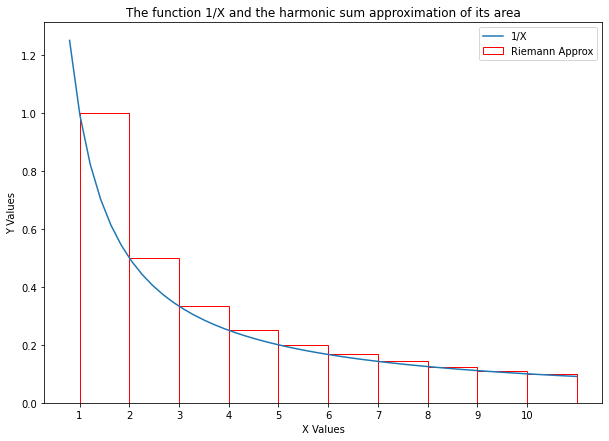

In [4]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 7)
x_places = np.linspace(0.8, 11)
bar_places = np.linspace(1, 10, 10)
ax.plot(x_places, 1/x_places, label="1/X")
ax.bar(bar_places, 1/bar_places, width=1, align='edge', fill=False, edgecolor='r', label='Riemann Approx')
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.xticks(bar_places)
plt.title("The function 1/X and the harmonic sum approximation of its area")
plt.legend()
plt.show()

## Handling errors by raising exceptions.

In the previous batch of exercises, we tried to modify functions to be a bit more intelligent -- identifying when numbers were "too big" for example.  There's a professional way to handle these situations, by raising *exceptions*.  Here is the [official documentation on errors and exceptions](https://docs.python.org/3/tutorial/errors.html).  We will focus on raising exceptions to catch "bad inputs" to functions.  Let's revisit our `is_even` function.

In [ ]:
def is_even(n):
    return (n%2 == 0)

In [ ]:
is_even(3.14)  # What will this do?

False

In [ ]:
3.14%2  # Well, this explains it!

1.1400000000000001

Although the output of `is_even(3.14)` might be what you want, a smarter function might let the user know that 3.14 should not be input into `is_even`.  We commonly ask whether *integers* are even or odd; if a non-integer ends up input to `is_even`, it might be a sign of a bug elsewhere.  One possibility is to modify the function by manually printing an error message.

In [ ]:
def is_even(n):
    if type(n) == int:
        return (n%2 == 0)
    else:
        print("Bad input!  Please input integers only.")
        return None

In [ ]:
is_even(4)

True

In [ ]:
is_even(3.14)

Bad input!  Please input integers only.


In [ ]:
print(is_even(3.14))

Bad input!  Please input integers only.
None


This behavior is a bit better.  The output of the function is neither True nor False, when a non-integer is input.  Instead, the smarter function outputs `None`, which is exactly what it sounds like.

In [ ]:
type(None) # A zen command.

NoneType

Instead of manually using a print command and returning None, we can use Python's built-in `exception` class.  Raising exceptions is the Pythonic way of catching errors, and this will make things smoother in the long term.  Here's a new and safe `is_even` function.

In [ ]:
def is_even(n):
    if type(n) == int:
        return (n%2 == 0)
    else:
        raise TypeError('Only integers can be even or odd.')

In [ ]:
is_even(3)

False

In [ ]:
is_even(3.14)

TypeError: ignored

Instead of manually printing the error message and returning `None`, we have raised a `TypeError`.  This gives information about the kind of error, and a custom error message is displayed at the end.  Type errors are meant for situations where a variable belongs to the wrong type.  `TypeError` is just one kind of "exception" -- the full built-in hierarchy of exceptions can be found in the [official Python documentation](https://docs.python.org/3/library/exceptions.html#exception-hierarchy).

Another kind of exception is the `ValueError`.  It seems similar to `TypeError` at first, but `ValueError` is meant to catch an input that has a "bad" value, even if it is the right type.  For example, here is a square root function that only works with positive input.  It should raise an exception (error message) when a negative number is input.  Both positive and negative numbers can be represented as floats, so the error doesn't represent the *wrong type*.  The error represents a *bad value*.  

In [ ]:
def sqrt(x):
    '''
    Estimates the square root of a positive number x.
    '''
    if x < 0:
        raise ValueError('Cannot approximate square root of negative numbers.')
    guess= x/2 # A decent place to start
    while True: # A dangerous loop!  See next section...
        new_guess = 0.5 * (guess + x/guess)
        if abs(new_guess - guess) < .000000001: # close enough!
            return new_guess
        guess = new_guess

In [ ]:
sqrt(3) # This should be ok.

1.7320508075688772

In [ ]:
sqrt(-3)

ValueError: ignored

By raising the `ValueError`, we have avoided an endless loop... the sort of problem that crashes computers!  If you know that your function is only meant for certain kinds of inputs, it is best to catch errors by raising exceptions.

###Exercises

1.  There's a special exception called `ZeroDivisionError`.  When do you think this occurs?  Try to make it occur!  Can you think of a time when you might want to raise this exception yourself?

2.  Make the `is_prime` function safer by raising a `TypeError` or a `ValueError` when a "bad" input occurs.

In [ ]:
# Use this space to work on exercises.
#1.
#print(5/0) # Indeed, this throws the ZeroDivisionError exception

#2. Modifying the is_prime function to raise TypeError or ValueError exceptions on bad input
def is_prime(n):
    '''
    Checks whether the argument n is a prime number.
    Uses a brute force search for factors between 1 and n.
    If the input is larger than 10^6, raise ValueError
    If the input is not an integer, raise TypeError
    '''
    if not type(n) == int:
      raise TypeError("Only integers can be prime.")
    if n > 1e6:
      raise ValueError("Invalid input!")
    for j in range(2,n):  # the list of numbers 2,3,...,n-1.
        if n%j == 0:  # is n divisible by j?
            print("{} is a factor of {}.".format(j,n))
            return False
    return True

In [ ]:
#print(is_prime(12347))
#is_prime(1000001) # Raises ValueError
is_prime(3.14) # Raises TypeError

TypeError: ignored

### Solutions
1. The `ZeroDivisionError` occurs when one tries to divide by 0, since this doesn't make sense, it raises an exception. I'm not sure I would raise this exception myself in most scenarios. The only time one would raise this exception is if, for whatever reason, one's code was about to divide by 0. But if the code was about to divide by 0, then Python would automatically raise this exception when that was done anyway. At first glance, it seems to me that raising this myself would simply be redundant. I suppose the only reason I might raise it myself is if I wanted to add a special message to the exception as it was raised.

2. A bad input, in the case of the `is_prime` function, is one that is either too large (bigger than $10^6$) or one that is not an integer. Only integers are considered prime. In the former case, we raise a `ValueError` as the input is the right type, but too large. In the latter case, we raise a `TypeError` as non-integer types can't be considered prime.

## While loops and implementation of the Eucidean algorithm

We *almost* have all the tools we need to implement the Euclidean algorithm.  The last tool we will need is the **while loop**.  We have seen the *for loop* already, which is very useful for iterating over a range of numbers.  The Euclidean algorithm involves repetition, but there is no way to know in advance how many steps it will take.  The while loop allows us to repeat a process as long as a boolean value (sometimes called a **flag**) is True.  The following countdown example illustrates the structure of a while loop.

In [ ]:
def countdown(n):
    current_value = n
    while current_value > 0:  # The condition (current_value > 0) is checked before every instance of the scope!
        print(current_value)
        current_value = current_value - 1
    print("Blastoff!")

In [ ]:
countdown(10)

10
9
8
7
6
5
4
3
2
1
Blastoff!


The while loop syntax begins with `while <boolean>:` and the following indented lines comprise the scope of the loop.  If the boolean is `True`, then the scope of the loop is executed.  If the boolean is `True` again afterwards, then the scope of the loop is executed again.  And again and again and so on.

This can be a **dangerous process**!  For example, what would happen if you made a little typo and the last line of the while loop read `current_value = current_value + 1`?  The numbers would increase and increase... and the boolean `current_value > 0` would **always** be `True`.  Therefore the loop would never end.  Bigger and bigger numbers would scroll down your computer screen.  

You might panic under such a circumstance, and maybe turn your computer off to stop the loop.  Here is some advice for when you get stuck in such a neverending loop, and you're using Google Colab.

1.  Back up your work often.  When you're programming, make sure everything else is saved just in case.
2.  Save your programming work (use "Save a copy in GitHub" and/or "Save a copy in Drive") often, especially before running a cell with a loop for the first time.
3.  If you *do* get stuck in a neverending loop, click on "Runtime... Interrupt execution".  This will often unstick the loop and allow you to pick up where you left off.  

Now, if you're feeling brave, save your work, change the while loop so that it never ends, and try to recover where you left off.  But be aware that this could cause your computer to freeze or behave erratically, crashing your browser, etc.  Don't panic... it probably won't break your computer permanently.

The neverending loop causes two problems here.  One is with the computer processor, which will be essentially spinning its wheels.  This is called [busy waiting](https://en.wikipedia.org/wiki/Busy_waiting), and the computer will essentially be busy waiting forever.  The other problem is that your loop is printing more and more lines of text into the notebook.  This could easily crash your web browser, which is trying to store and display zillions of lines of numbers.  So be ready for problems!  

### The Euclidean algorithm with a while loop

The **Euclidean Algorithm** is a process of repeated division with remainder.  Beginning with two integers `a` (dividend) and `b` (divisor), one computes quotient `q` and remainder `q` to express `a = qb + r`.  Then `b` becomes the dividend and `r` becomes the divisor, and one repeats.  The repetition continues, and the **last nonzero** remainder is the greatest common divisor of `a` and `b`.

We implement the Euclidean algorithm in a few variations.  The first will be a verbose version, to show the user what happens at every step.  We use a while loop to take care of the repetition.

In [ ]:
def Euclidean_algorithm(a,b):
    dividend = a
    divisor = b
    while divisor != 0:   # Recall that != means "is not equal to".
        quotient = dividend // divisor
        remainder = dividend % divisor
        print("{} = {} ({}) + {}".format(dividend, quotient, divisor, remainder))
        dividend = divisor  
        divisor = remainder

In [ ]:
Euclidean_algorithm(133, 58)

133 = 2 (58) + 17
58 = 3 (17) + 7
17 = 2 (7) + 3
7 = 2 (3) + 1
3 = 3 (1) + 0


In [ ]:
Euclidean_algorithm(1312331323, 58123123)

1312331323 = 22 (58123123) + 33622617
58123123 = 1 (33622617) + 24500506
33622617 = 1 (24500506) + 9122111
24500506 = 2 (9122111) + 6256284
9122111 = 1 (6256284) + 2865827
6256284 = 2 (2865827) + 524630
2865827 = 5 (524630) + 242677
524630 = 2 (242677) + 39276
242677 = 6 (39276) + 7021
39276 = 5 (7021) + 4171
7021 = 1 (4171) + 2850
4171 = 1 (2850) + 1321
2850 = 2 (1321) + 208
1321 = 6 (208) + 73
208 = 2 (73) + 62
73 = 1 (62) + 11
62 = 5 (11) + 7
11 = 1 (7) + 4
7 = 1 (4) + 3
4 = 1 (3) + 1
3 = 3 (1) + 0


This is excellent if we want to know every step of the Euclidean algorithm.  If we just want to know the GCD of two numbers, we can be less verbose.  We carefully return the last nonzero remainder after the while loop is concluded.  This last nonzero remainder becomes the divisor when the remainder becomes zero, and then it would become the dividend in the next (unprinted) line.  That is why we return the (absolute value) of the dividend after the loop is concluded.  You might insert a line at the end of the loop, like `print(dividend, divisor, remainder)` to help you track the variables.

In [19]:
def GCD(a,b):
    dividend = a # The first dividend is a.
    divisor = b # The first divisor is b.
    while divisor != 0:   # Recall that != means "not equal to".
        quotient = dividend // divisor
        remainder = dividend % divisor
        dividend = divisor  
        divisor = remainder
    return abs(dividend)  #  abs() is used, since we like our GCDs to be positive.

In [ ]:
# Test runtime
%time GCD(123456789, 987654321) # 5-9 microseconds CPU time

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 8.82 µs


9

Note that the `return dividend` statement occurs *after* the scope of the while loop.  So as soon as the *divisor* variable equals zero, the funtion `GCD` returns the *dividend* variable and terminates.

In [ ]:
GCD(111,27)

3

In [ ]:
GCD(111,-27)

3

We can refine our code in a few ways.  First, note that the `quotient` variable is never used!  It was nice in the verbose version of the Euclidean algorithm, but plays no role in finding the GCD.  Our refined code reads
```python
def GCD(a,b):
    dividend = a  
    divisor = b  
    while divisor != 0:   # Recall that != means "not equal to".
        remainder = dividend % divisor
        dividend = divisor  
        divisor = remainder
    return abs(dividend) 
```

Now there are two slick Python tricks we can use to shorten the code.  The first is called **multiple assignment**.  It is possible to set the values of two variables in a single line of code, with a syntax like below.

In [ ]:
x,y = 2,3  # Sets x to 2 and y to 3.

This is particular useful for self-referential assignments, because as for ordinary assignment, the right side is evaluated first and then bound to the variables on the left side.  For example, after the line above, try the line below.  Use print statements to see what the values of the variables are afterwards!

In [ ]:
x,y = y,x #  Guess what this does!

In [ ]:
print("x =",x) # One could use "x = {}".format(x) too.
print("y =",y)

x = 3
y = 2


Now we can use multiple assignment to turn three lines of code into one line of code.  For the `remainder` variable is only used temporarily before its value is given to the `divisor` variable.  Using multiple assignment, the three lines
```python
    remainder = dividend % divisor
    dividend = divisor  
    divisor = remainder
```
can be written in one line,
```python
    dividend, divisor = divisor, dividend % divisor # Evaluations on the right occur before any assignments!
```

Our newly shortened GCD function looks like this.
```python
def GCD(a,b):
    dividend = a  
    divisor = b  
    while divisor != 0:   # Recall that != means "not equal to".
        dividend, divisor = divisor, dividend % divisor
    return abs(dividend)
```

The next trick involves the while loop.  The usual syntax has the form `while <boolean>:`.  But if `while` is followed by a numerical type, e.g. `while <int>:`, then the scope of the while loop will execute as long as the number is nonzero!  Therefore, the line
```python
while divisor != 0:
```
can be replaced by the shorter line
```python
while divisor:
```

This is truly a trick.  It probably won't speed anything up, and it does not make your program easier to read for beginners.  So use it if you prefer communicating with experienced Python programmers!  Here is the whole function again.
```python
def GCD(a,b):
    dividend = a  
    divisor = b  
    while divisor:   # Executes the scope if divisor is nonzero.
        dividend, divisor = divisor, dividend % divisor
    return abs(dividend)
```

The next optimization is a bit more dangerous for beginners, but it works here.  In general, it can be dangerous to operate directly on the arguments to a function.  But in this setting, it is safe, and makes no real difference to the Python interpreter.  Instead of creating new variables called `dividend` and `divisor`, one can manipulate `a` and `b` directly within the function.  If you do this, the GCD function can be shortened to the following.

In [20]:
def GCD(a,b):
    while b:   # I.e., while b != 0.
        a, b = b, a % b
    return abs(a)

In [ ]:
# Try it out.  Try it on some big numbers and see how quick it runs!
#%time GCD(123456789, 987654321) # 5-8 microseconds CPU time
%time GCD(123456789101112, 121110987654321) # 10-12 microseconds CPU time

CPU times: user 9 µs, sys: 1 µs, total: 10 µs
Wall time: 13.1 µs


3

The previous incarnation of the `GCD` function ran the above line in 5-9 $\mu$s. This, pared down version, runs the same line of code in 5-8 $\mu$s. Essentially, these time values are the same. However, this function does compute the GCD of two rather large numbers quite quickly.

This code is essentially optimal, if one wishes to execute the Euclidean algorithm to find the GCD of two integers.  It almost [matches the GCD code in a standard Python library](https://stackoverflow.com/a/18944210).  It might be slightly faster than our original code -- but there is a tradeoff here between execution speed and readability of code.  In this and the following lessons, we often optimize enough for everyday purposes, but not so much that readability is lost.

### Exercises and explorations

1.  Modify the `is_prime` function by using a while loop instead of `for j in range(2,n):`.  Hint:  the function should contain the lines `j = 2` and `while j < n:` and `j = j + 1` in various places.  Why might this be an improvement from the for loop?  Can you look for factors within a smaller range?

2.  Modify the `Euclidean_algorithm` function to create a function which returns the *number of steps* that the Euclidean algorithm requires, i.e., the number of divisions-with-remainder.  How does the number of steps compare to the size of the input numbers?  

3.  When $a$ and $b$ are integers, $GCD(a,b) \cdot LCM(a,b) = ab$.  Use this fact to write an LCM-function.  Try to make your function output only integers (not floats) and behave in a good way even if $a,b$ are zero.

4.  How does the `GCD(a,b)` function behave when `a` and/or `b` are zero or negative?  Is this good?

5.  Challenge:  Write a function `approximate_e(n)` which approximates $e$ with a maximum error of $10^{-n}$.  (You can assume $n < 1000$ if necessary.)  Try a while loop and `import mpmath`.  Back up your work often! 

In [16]:
import mpmath
mpmath.mp.dps = 15
print(mpmath.mp)

Mpmath settings:
  mp.prec = 53                [default: 53]
  mp.dps = 15                 [default: 15]
  mp.trap_complex = False     [default: False]


In [44]:
# Use this space to work on the exercises.
#1. Modifying is_prime to use a while loop
def is_prime(n):
    '''
    Checks whether the argument n is a prime number.
    Uses a brute force search for factors between 1 and n.
    If the input is larger than 10^6, raise ValueError
    If the input is not an integer, raise TypeError
    '''
    if not type(n) == int:
      raise TypeError("Only integers can be prime.")
    if n > 1e6:
      raise ValueError("Number too big!")
    j = 2
    while j < n:
        if n%j == 0:  # is n divisible by j?
            print("{} is a factor of {}.".format(j,n))
            return False
        j = j + 1
    return True

# A modified version of is_prime which searches for factors in a smaller range
def is_prime_mod(n):
    '''
    Checks whether the argument n is a prime number.
    Uses a brute force search for factors between 1 and sqrt(n).
    If the input is larger than 10^6, raise ValueError
    If the input is not an integer, raise TypeError
    '''
    if not type(n) == int:
      raise TypeError("Only integers can be prime.")
    if n > 1e6:
      raise ValueError("Number too big!")
    j = 2
    max_val = sqrt(n) # Don't compute sqrt every iteration
    while j <= max_val: # Check only numbers between 2 and sqrt(n), explained below (include sqrt(n) in case it is an integer)
        if n%j == 0:  # is n divisible by j?
            print("{} is a factor of {}.".format(j,n))
            return False
        j += 1
    return True

#2. 
def Euclidean_algorithm(a,b):
    dividend = a
    divisor = b
    steps = 0
    while divisor != 0:   # Recall that != means "is not equal to".
        quotient = dividend // divisor
        remainder = dividend % divisor
        print("{} = {} ({}) + {}".format(dividend, quotient, divisor, remainder))
        dividend = divisor  
        divisor = remainder
        steps += 1
    return steps

#3.
def LCM(a, b):
  if a==b==0: # In this case, GCD(0, 0) returns 0 and we would get a divide by zero error. Instead, return 0.
    return 0
  elif not type(a)==int or not type(b) == int:
    raise TypeError("LCM only computed between integers.")
  else: # Else, return integer result of division.
    return int((a*b) / GCD(a, b))

#4. See solutions below

#5. Approximate e with maximum error of 10^-n
def approximate_e(n):
  # Input n should be an mp float so the input value can have arbitrary precision
  # Approximating e using exponential series e^x with x=1
  # This is e^x=1+x + x^2/2! + x^3/3! + ...
  # Set precision of mpmath to be high enough to approximate as desired
  mpmath.mp.dps = n+5
  exp = mpmath.mpf(1)
  # Keep count of the number of iterations through the loop
  i = 1
  factorial = 1
  while True:
    # Add the next term in the series
    new_exp = exp + mpmath.mpf(1)/mpmath.mpf(factorial)
    if abs(new_exp - exp) < mpmath.power(10, -1*n): # Error should be at most 10^-n
      return new_exp
    i += 1
    factorial *= i
    exp = new_exp 


Testing of the code above

In [ ]:
# 1. Testing
#is_prime(1331)
%time is_prime(123457) # about 20 ms

CPU times: user 18.9 ms, sys: 0 ns, total: 18.9 ms
Wall time: 19.3 ms


True

In [ ]:
%time is_prime_mod(123457) # about 120 microseconds!!

CPU times: user 112 µs, sys: 12 µs, total: 124 µs
Wall time: 130 µs


True

In [ ]:
# Testing 2.
Euclidean_algorithm(4567, 1234)

4567 = 3 (1234) + 865
1234 = 1 (865) + 369
865 = 2 (369) + 127
369 = 2 (127) + 115
127 = 1 (115) + 12
115 = 9 (12) + 7
12 = 1 (7) + 5
7 = 1 (5) + 2
5 = 2 (2) + 1
2 = 2 (1) + 0


10

In [23]:
# Testing 3.
print(LCM(6, 8))
print(LCM(12, 123))
#print(LCM(12, 14.5)) # Type Error

24
492


In [ ]:
# Testing 4.
print(GCD(0, 5))
print(GCD(0, 6))
print(GCD(-5, 35))
print(GCD(5, -35))
print(GCD(-5, -35))
print(GCD(0, 0))

5
6
5
5
5
0


In [48]:
# Testing 5.
# Here we test our approximation of e to n decimal places.
n = 1000
# Get e to this precision (for testing purposes)
mpmath.mp.dps=n+5
real_e = mpmath.e
print("Actual value of e accurate to {} decimal points (from mpmath): {}".format(n+5, real_e))
approx_e = approximate_e(mpmath.mpf(n))
print("Our value of e accurate to at least {} decimal points (approximation): {}".format(n, approx_e))
print("Our approximation is off by about {}".format(mpmath.nstr(abs(approx_e - real_e), 5)))

Actual value of e accurate to 1005 decimal points (from mpmath): 2.718281828459045235360287471352662497757247093699959574966967627724076630353547594571382178525166427427466391932003059921817413596629043572900334295260595630738132328627943490763233829880753195251019011573834187930702154089149934884167509244761460668082264800168477411853742345442437107539077744992069551702761838606261331384583000752044933826560297606737113200709328709127443747047230696977209310141692836819025515108657463772111252389784425056953696770785449969967946864454905987931636889230098793127736178215424999229576351482208269895193668033182528869398496465105820939239829488793320362509443117301238197068416140397019837679320683282376464804295311802328782509819455815301756717361332069811250996181881593041690351598888519345807273866738589422879228499892086805825749279610484198444363463244968487560233624827041978623209002160990235304369941849146314093431738143640546253152096183690888707016768396424378140592714563549061303

### Solutions
1. I suppose the while loop might be better than the for loop because it just has to do a simple boolean comparison before each loop is run and add one to `j` after each iteration, whereas the for loop has to remember the previous number, compute the next number in the range, and then see if the number is still within the range specified before running. Another reason why the while loop might be better is that sometimes you don't know how many times the loop should run. In fact, it might require a different number of iterations for every input. In such situations, for loops can be hard to make work, but while loops can keep running until the condition is no longer satisfied, regardless of the number of iterations it takes.

  On the subject of checking numbers in a smaller range, one doesn't have to check all numbers between 2 and n. In fact, once one checks the numbers between 2 and $\sqrt{n}$, then any number checked after that is redundant. To show that this is true, suppose we have checked all numbers between 2 and $\sqrt{n}$ and found that none are divisors of $n$. Then if $x\cdot y = n$ for some $x>\sqrt{n}$, then necessarily we have $y<\sqrt{n}$. But then $y$ has already been checked and we discovered that $y$ didn't divide $n$, so such a product $x\cdot y=n$ is impossible. Therefore, once we check numbers up to $\sqrt{n}$, we are done. If no divisors have been found, then none exist. This results in the modified `is_prime_mod` function above. When running `is_prime` on 123457, the original implementation takes ~20 milliseconds, but the modified implementation takes just ~120 microseconds. I.e., instead of taking ~20,000 microseconds, the modified code runs in just ~120 microseconds.

2. When testing the modified `Euclidean_algorithm` function, it seems that in general the number of steps required in the algorithm goes up with the size of the input numbers. There are exceptions to this, but typically it is true. For example, when computing `Euclidean_algorithm(4567, 1234)`, it takes 10 steps to finish. Then `Euclidean_algorithm(4567, 123)` takes just 5 steps, `Euclidean_algorithm(4567, 123)` also takes 5 steps, and `Euclidean_algorithm(4567, 1)` takes only 1 step. One obvious exception to this rule is if both numbers are the same, e.g. `Euclidean_algorithm(1234, 1234)`. In this trivial case, it takes just one step.

3. See function `LCM` above.

4. When `a` and `b` are both zero, `GCD(a, b)` returns zero. This is a strange case because any number divides zero. Therefore we technically could say that any arbitrarily large number is a divisor of both `a` and `b`. Since this is a strange case, it might just make sense to define `GCD(0, 0)` as zero. When one of `a` and `b` is zero, then the `GCD` function returns the value of the one which is non-zero. This makes sense because, as mentioned above, any number divides zero, so the largest common divisor of the two values is the largest divisor of the non-zero one, or just the non-zero value itself. If negative values are included, then the `GCD` function returns the largest divisor of the two values, which is some positive integer. This makes sense because we usually define the GCD to be positive. Overall, the results from the `GCD` function are good, with the possible exception of `GCD(0, 0)` depending on how we want to define it.

5. See code above. My function `approximate_e` above sets the precision of the mpmath package to be `n+5`, so that we can tell whether we are off by less than $10^{-n}$. It then uses a `while` loop to keep adding terms in the series approximation for e until the difference between the running total and the approximation with the next term is less than the desired error of $10^{-n}$. It should, in theory, be able to generate an approximation good enough to satisfy any input n. I've tested it for n=1000 without issue (See code cell above).